<a href="https://colab.research.google.com/github/AlexisCohen/Data-Sci/blob/main/Alexis_Cohen_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

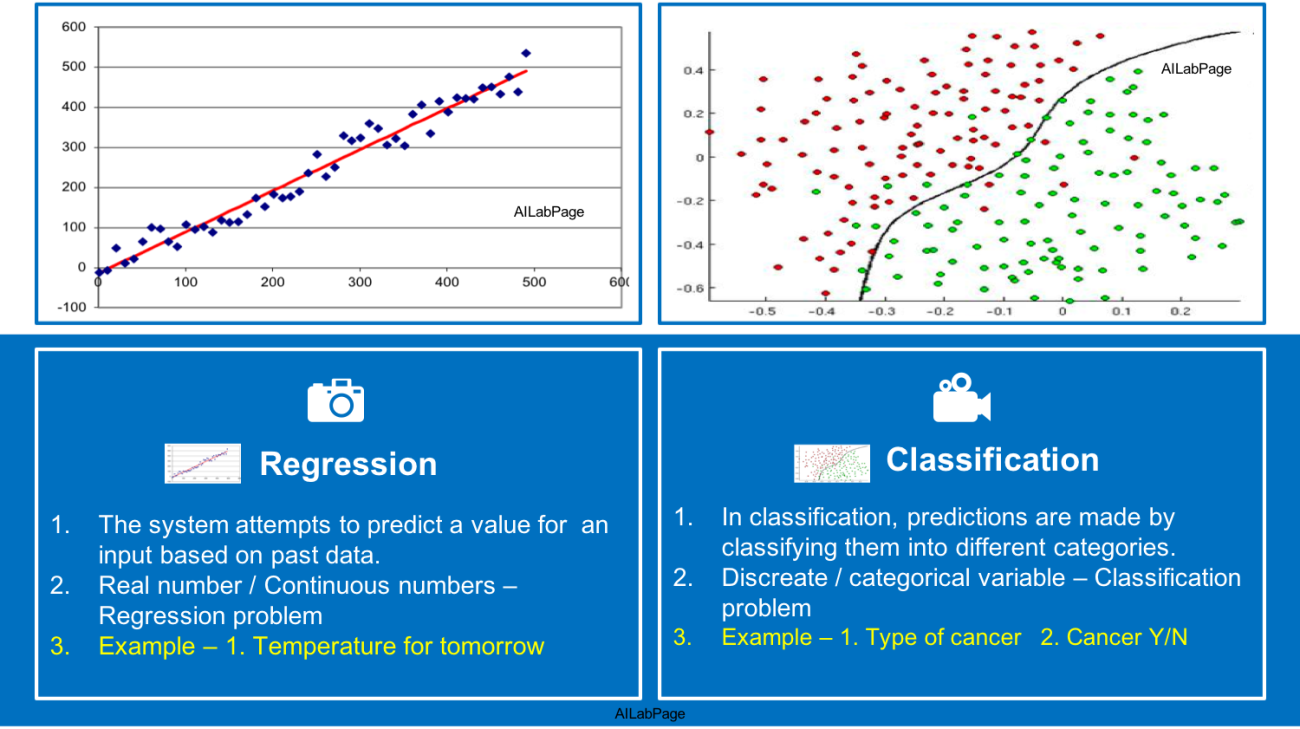

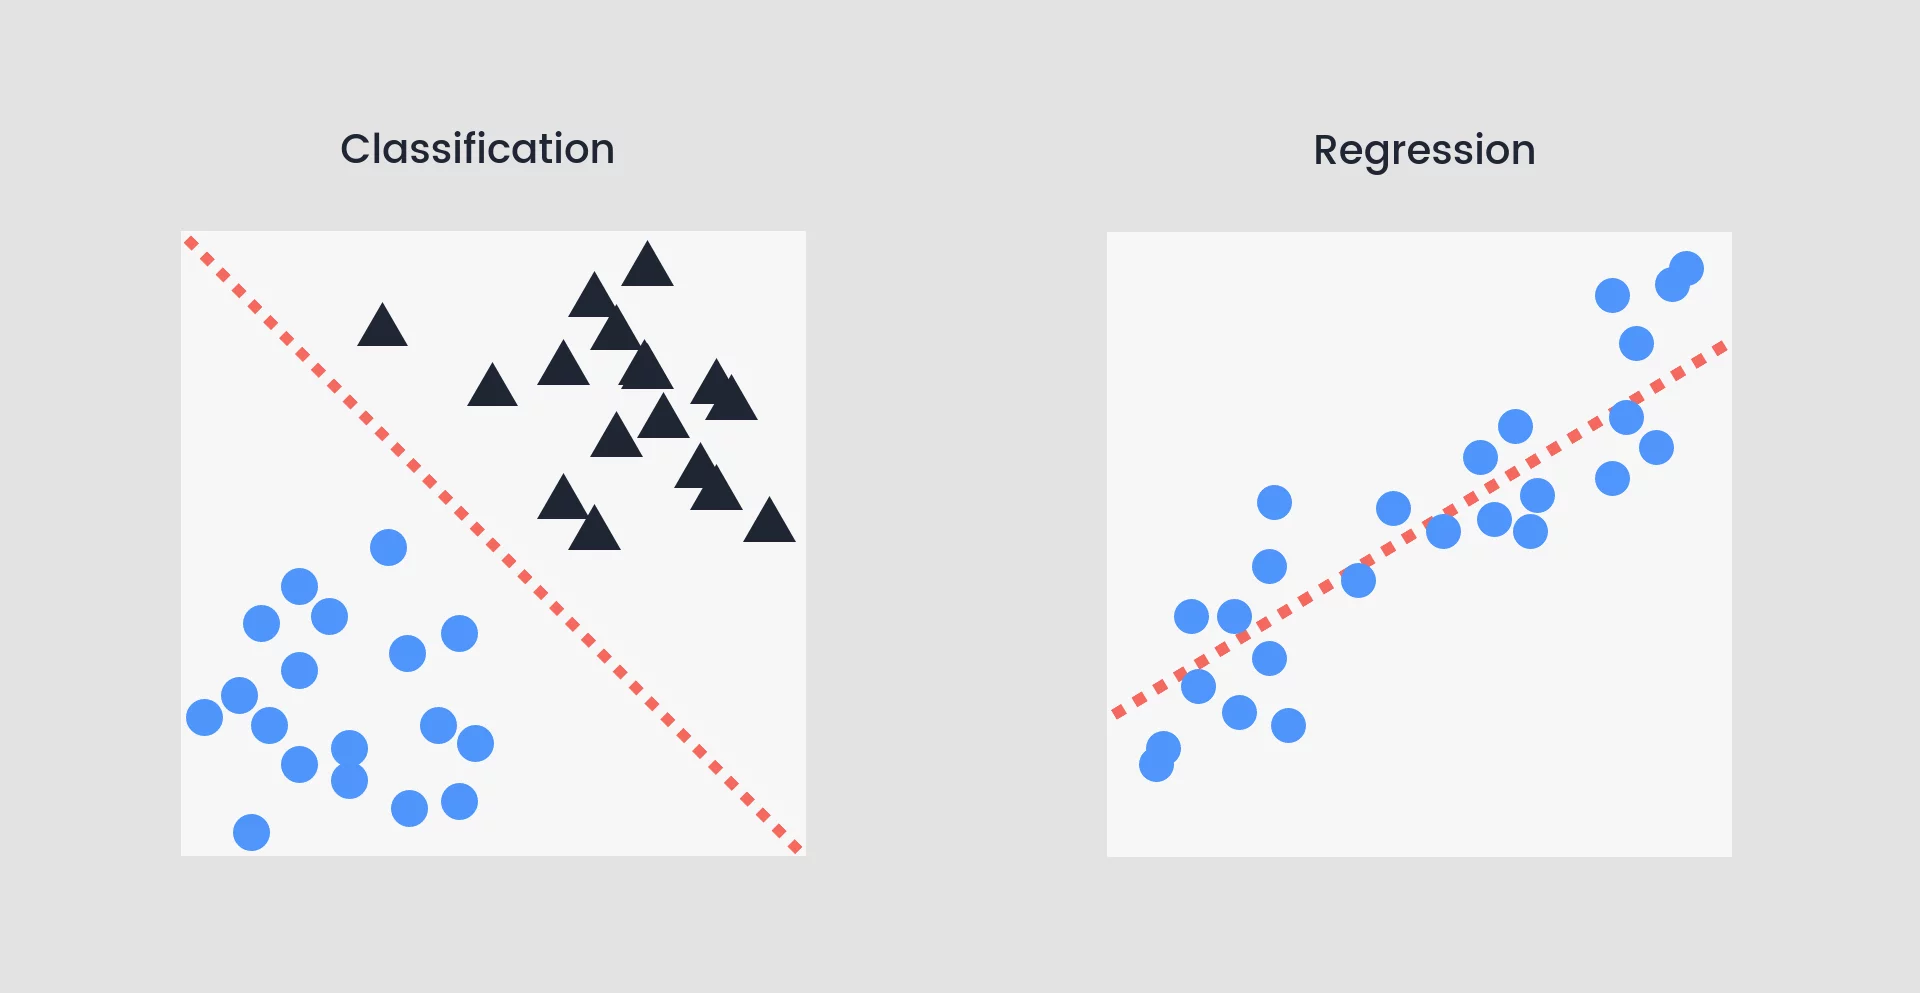

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

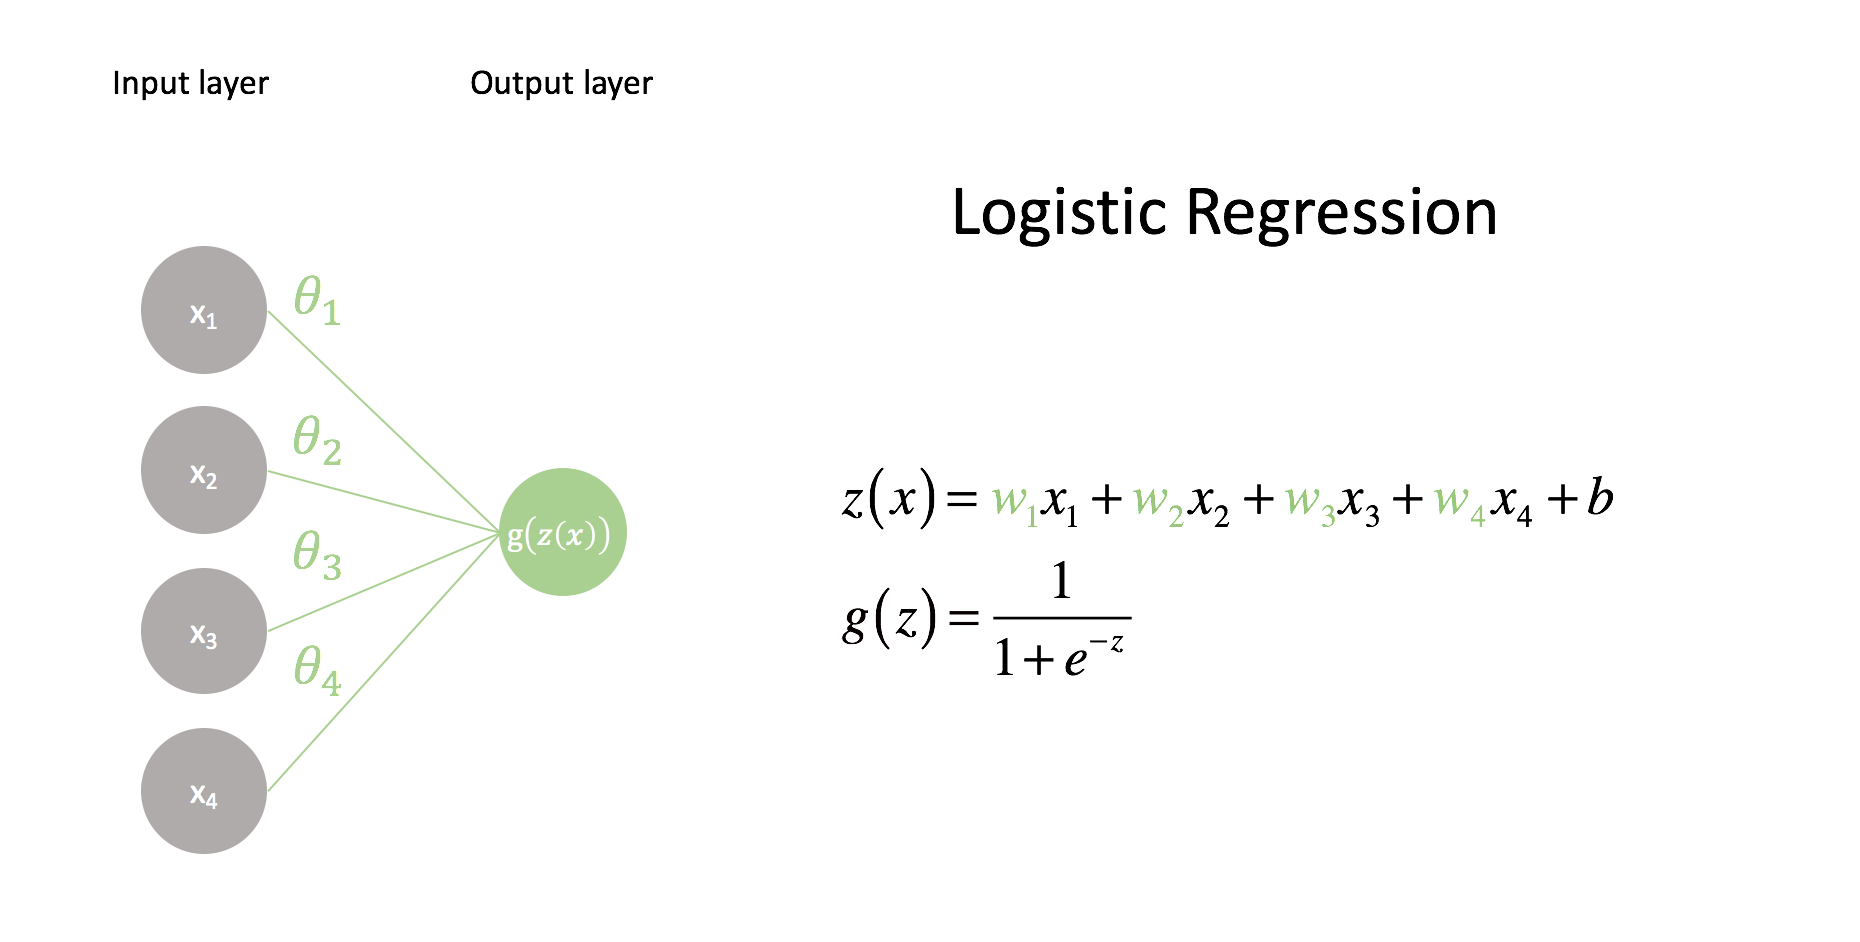

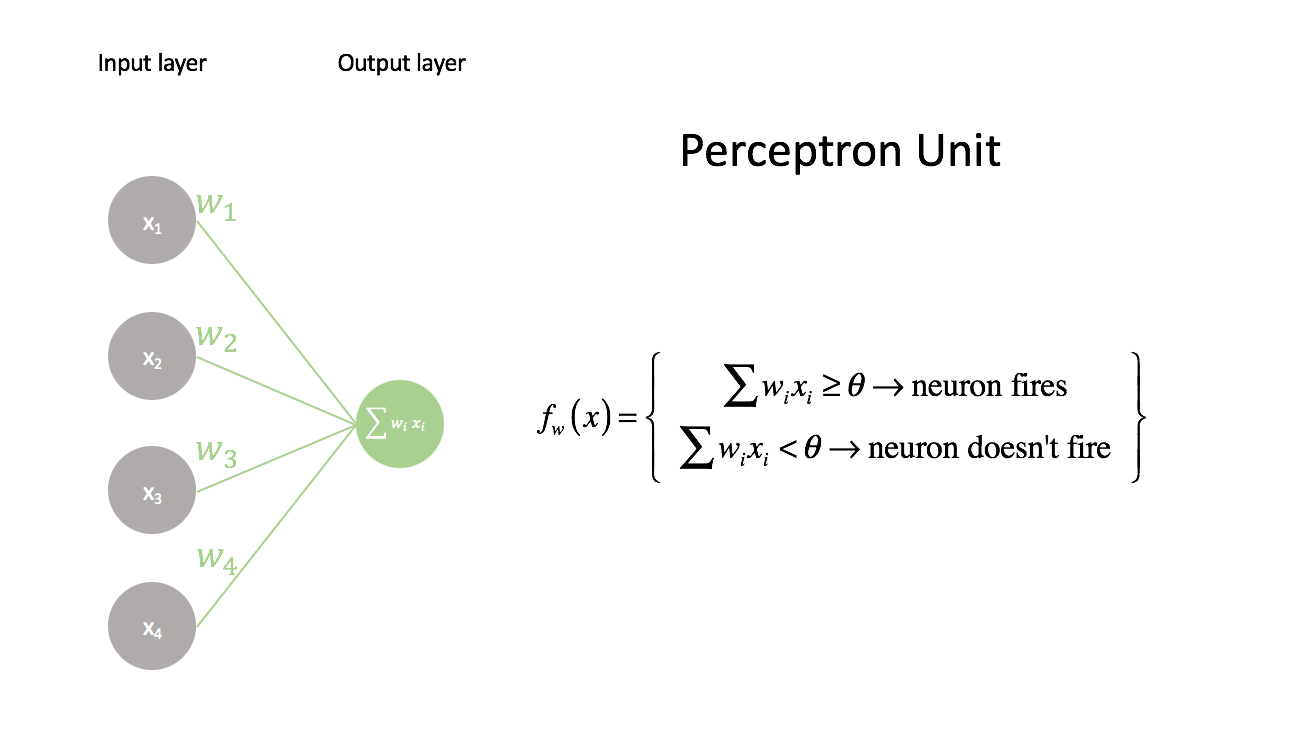

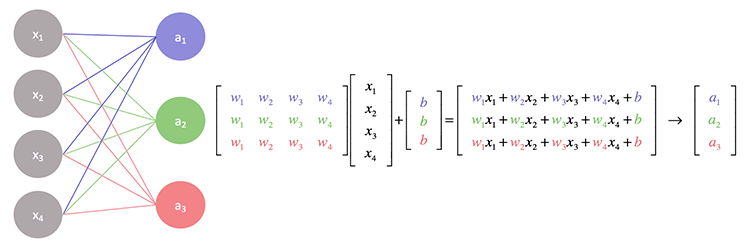

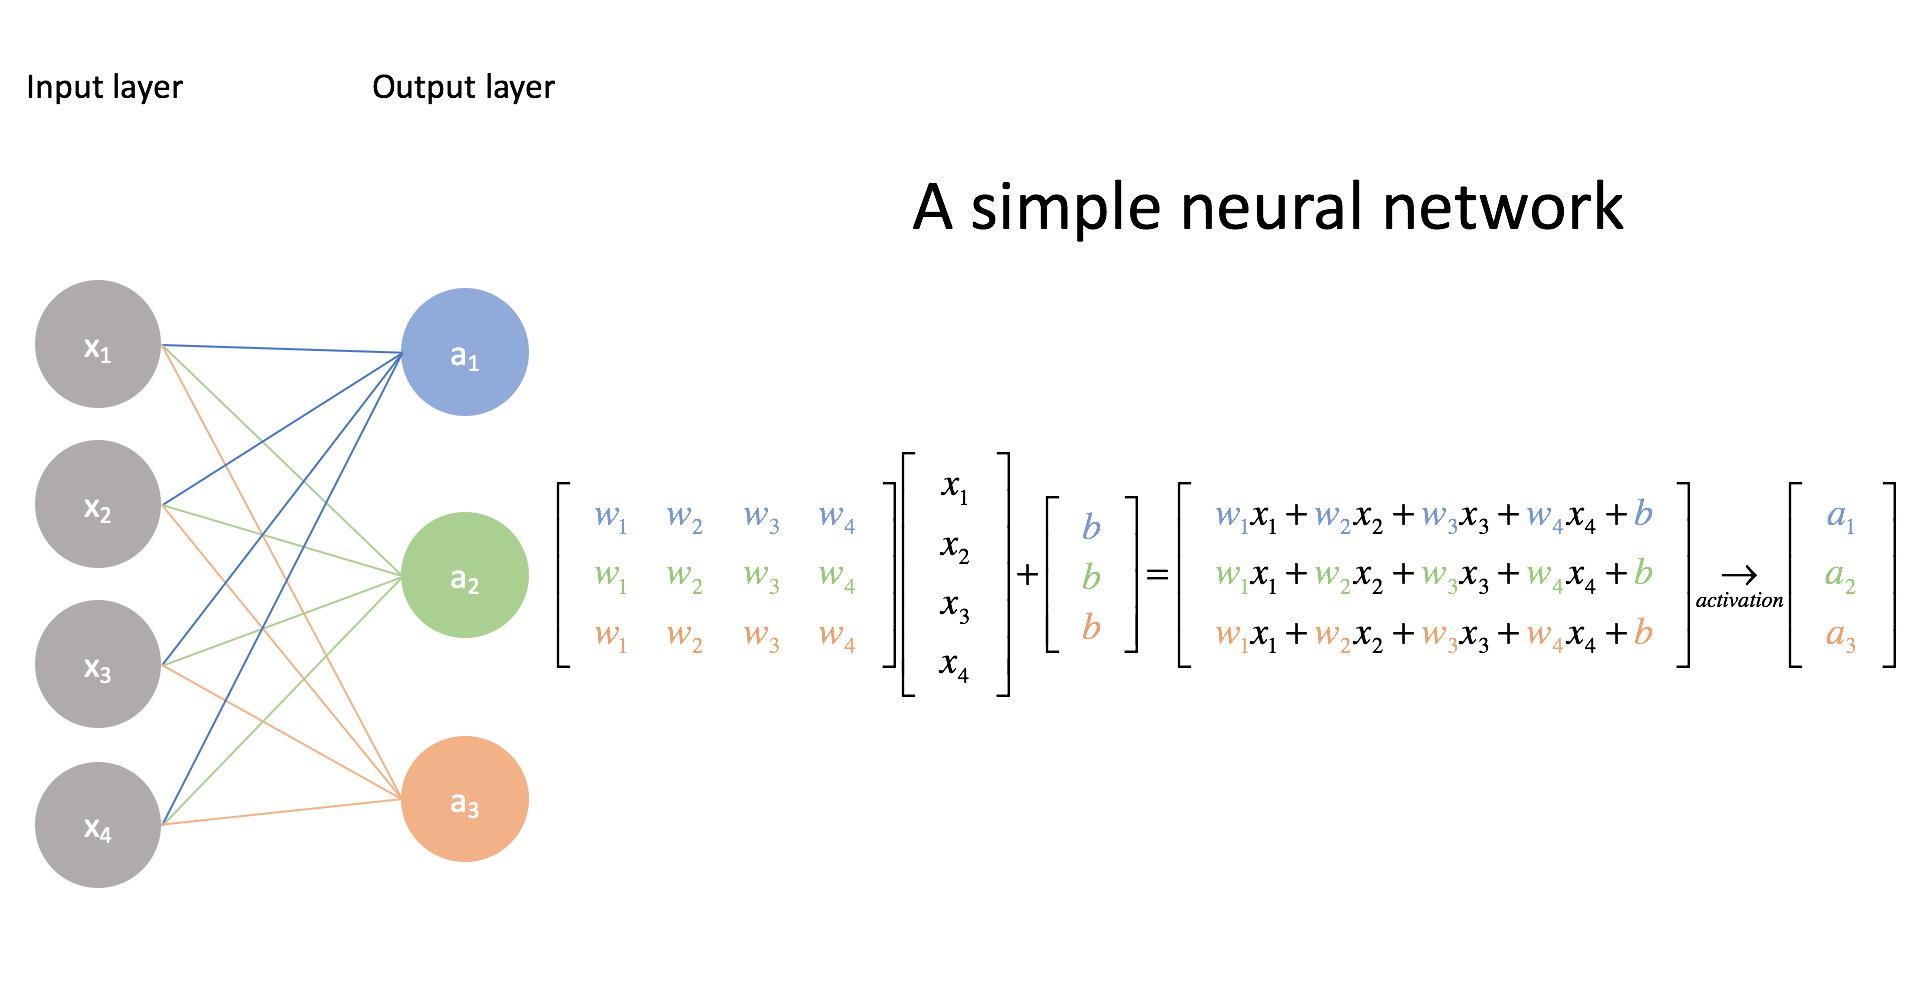

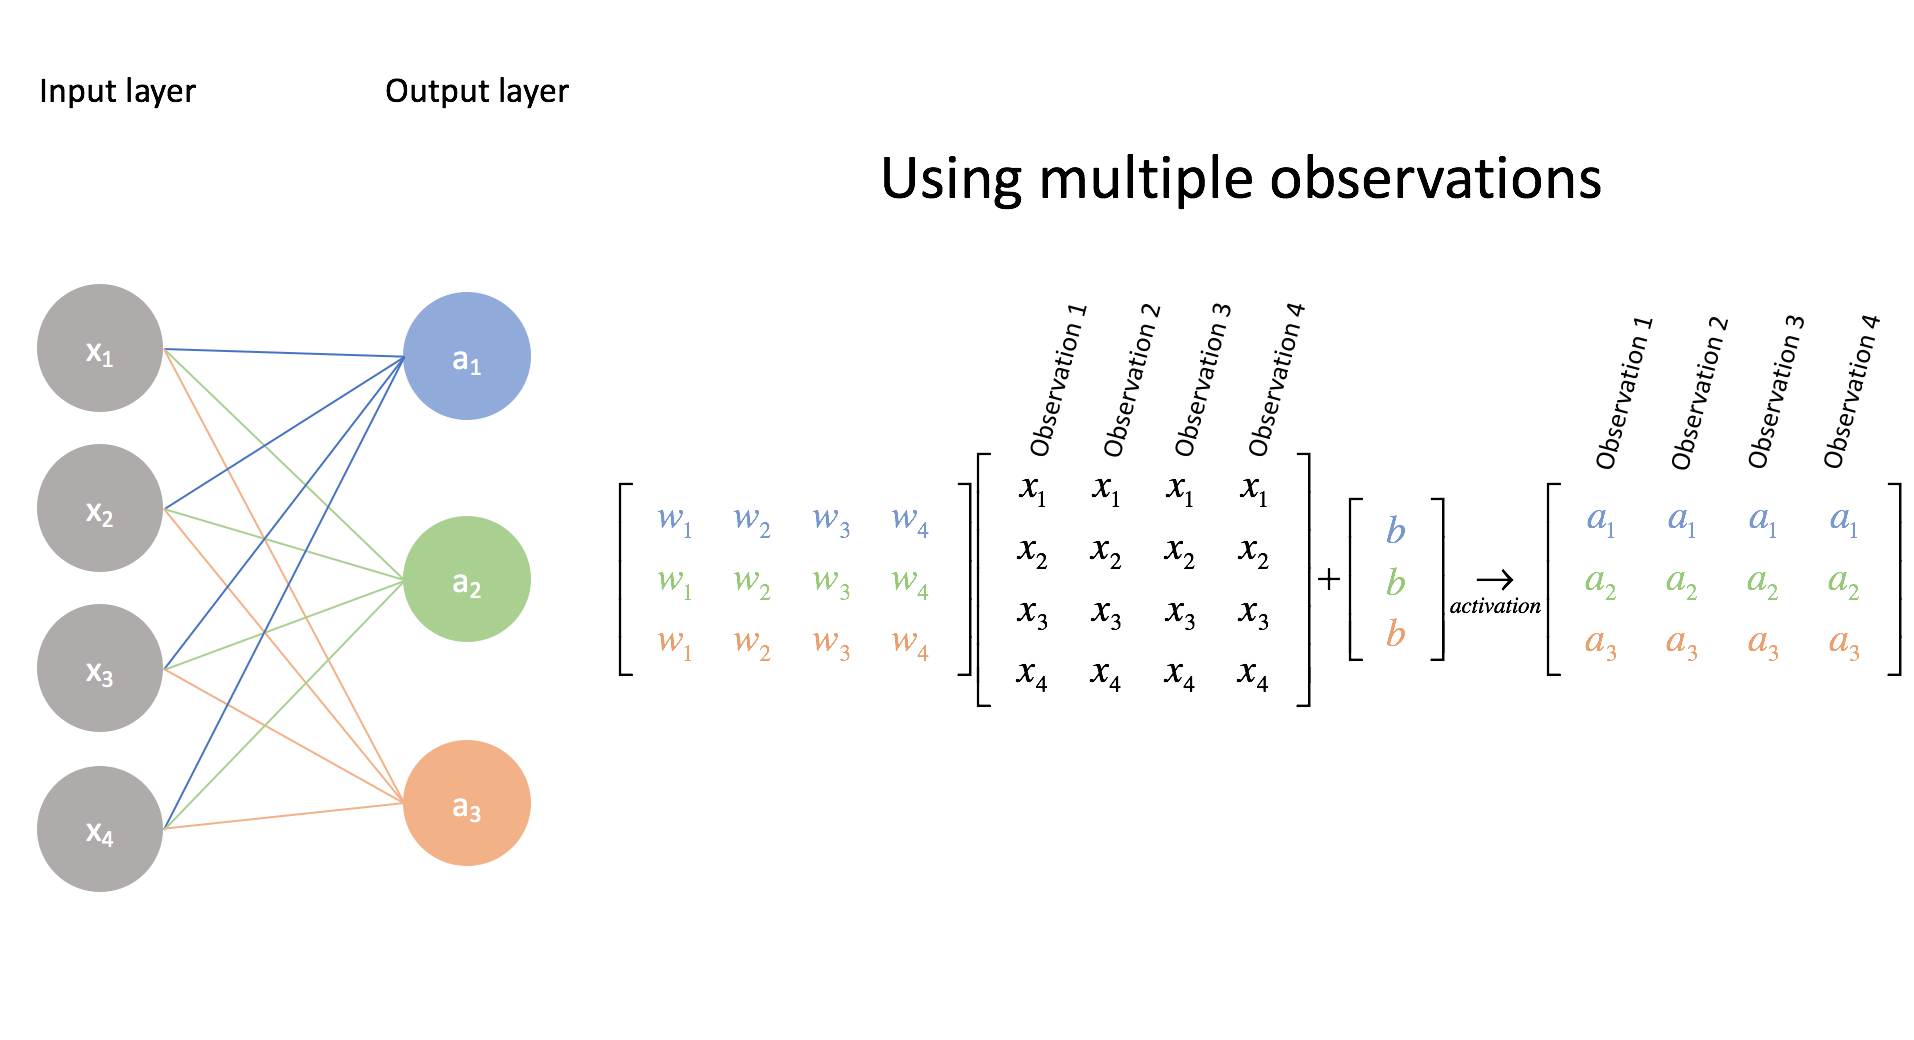

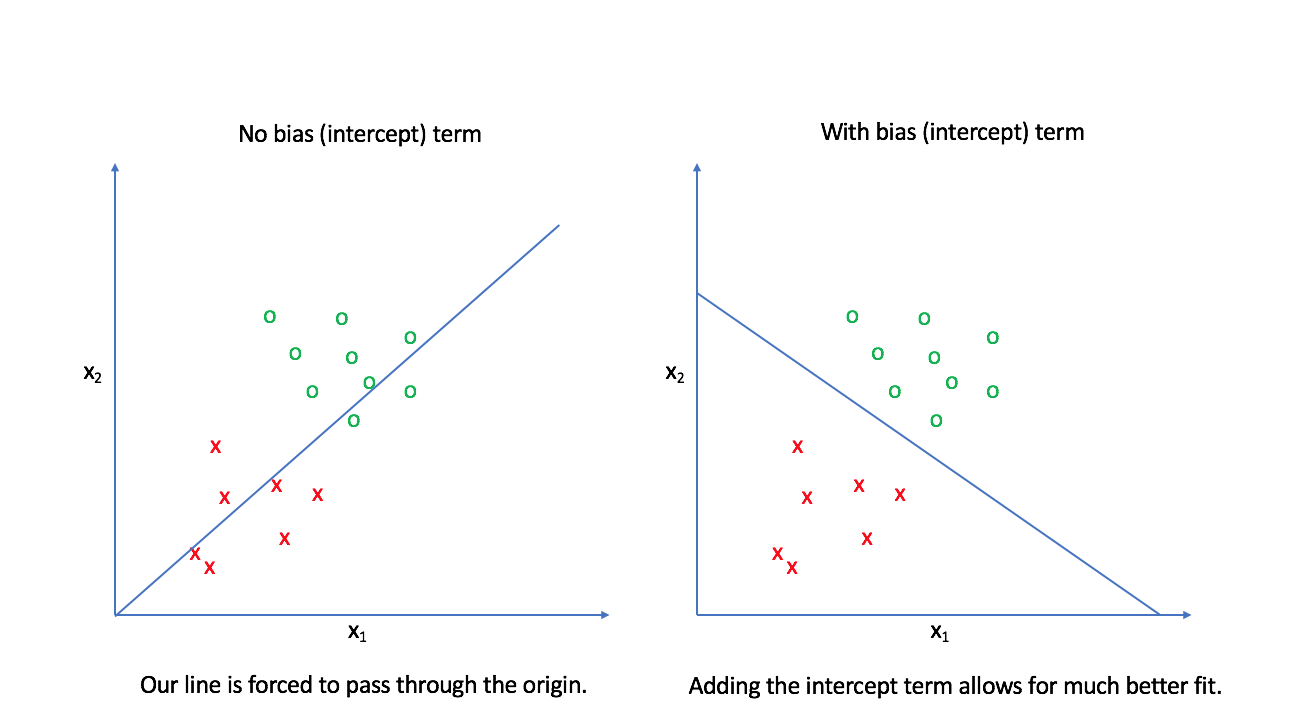

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-kk9v_yo3
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-kk9v_yo3
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=4a0532e4ad5578fe296876e5b661c110cbe2bce4376e9ae62e81b7bfe355d891
  Stored in directory: /tmp/pip-ephem-wheel-cache-90gvuhqg/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=7475b3cb1976f9c6ae0f1063670e2bc974dd27010ec4b6380d80d1d4658894d1
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# $y=mx+b$

In [16]:
x = np.arange(0,9)
#creates an array from 0 to 8

In [17]:
x.shape
#this is the length of the list

(9,)

In [18]:
x = x[:,None]
#this makes the list become 9 rows instead of 1

In [20]:
x.shape
#this is the shape of the array

(9, 1)

In [22]:
y = 3*x-5
#assigns a formula to y (slope line)

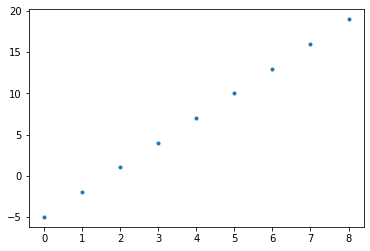

In [24]:
plt.plot(x,y,'.')
#plots x and y

##Solve Linear Fit Using Pytorch Gradient Descent

In [25]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [26]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [28]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [29]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

0 1781.052490234375 0.2637253999710083 1.0248421430587769
1 667.1121826171875 0.9463368058204651 1.113406777381897
2 292.7890625 1.3440661430358887 1.1512292623519897
3 166.53639221191406 1.576798677444458 1.1597343683242798
4 123.49231719970703 1.7139639854431152 1.1513296365737915
5 108.36312103271484 1.7957708835601807 1.1332002878189087
6 102.6034927368164 1.845505952835083 1.1095072031021118
7 99.99337005615234 1.8766549825668335 1.0826596021652222
8 98.44651794433594 1.8970282077789307 1.0540525913238525
9 97.26317596435547 1.9111489057540894 1.0244935750961304
10 96.20854187011719 1.921636700630188 0.9944499731063843
11 95.20379638671875 1.9300085306167603 0.9641920328140259
12 94.22245788574219 1.9371432065963745 0.9338759779930115
13 93.2555923461914 1.9435497522354126 0.9035918712615967
14 92.3000717163086 1.949522852897644 0.8733916282653809
15 91.3548355102539 1.9552333354949951 0.8433049321174622
16 90.41944885253906 1.960780143737793 0.813348650932312
17 89.49369049072266

In [30]:
loss.item()

0.0036554408725351095

In [31]:
m.item()

2.993394136428833

In [32]:
b.item()

-4.963037014007568

# Pytorch Linear Model

In [33]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [34]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [35]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [36]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [37]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


1 1000 35.7077522277832
2 1000 16.978296279907227
3 1000 11.592053413391113
4 1000 9.988399505615234
5 1000 9.457663536071777
6 1000 9.231882095336914
7 1000 9.093385696411133
8 1000 8.980473518371582
9 1000 8.875652313232422
10 1000 8.77395248413086
11 1000 8.673954963684082
12 1000 8.575248718261719
13 1000 8.47770881652832
14 1000 8.381291389465332
15 1000 8.28597354888916
16 1000 8.191743850708008
17 1000 8.09858226776123
18 1000 8.006481170654297
19 1000 7.915426254272461
20 1000 7.825407981872559
21 1000 7.736413955688477
22 1000 7.648431777954102
23 1000 7.561450481414795
24 1000 7.475458145141602
25 1000 7.39044189453125
26 1000 7.306394577026367
27 1000 7.223304748535156
28 1000 7.1411566734313965
29 1000 7.059943675994873
30 1000 6.979654312133789
31 1000 6.9002790451049805
32 1000 6.821805000305176
33 1000 6.744224548339844
34 1000 6.6675262451171875
35 1000 6.591699123382568
36 1000 6.516735553741455
37 1000 6.442624092102051
38 1000 6.36935567855835
39 1000 6.2969198226928

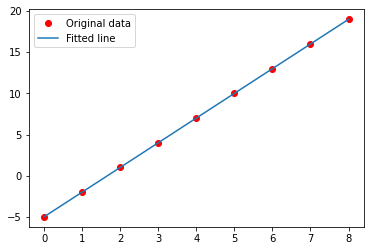

In [38]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [39]:
model

Linear(in_features=1, out_features=1, bias=True)

In [40]:
model.weight

Parameter containing:
tensor([[2.9966]], requires_grad=True)

In [41]:
model.bias

Parameter containing:
tensor([-4.9811], requires_grad=True)

In [42]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [43]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [44]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [45]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [46]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [47]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [48]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [49]:
X.shape

(60000, 1, 28, 28)

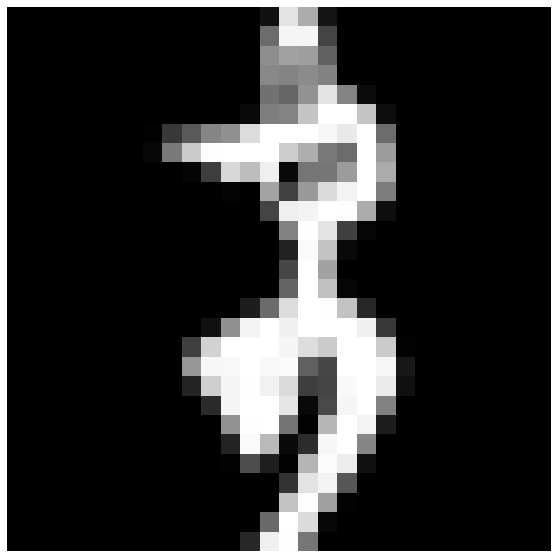

In [50]:
plot(X[454,0,:,:])
#this plots one of the japanese characters

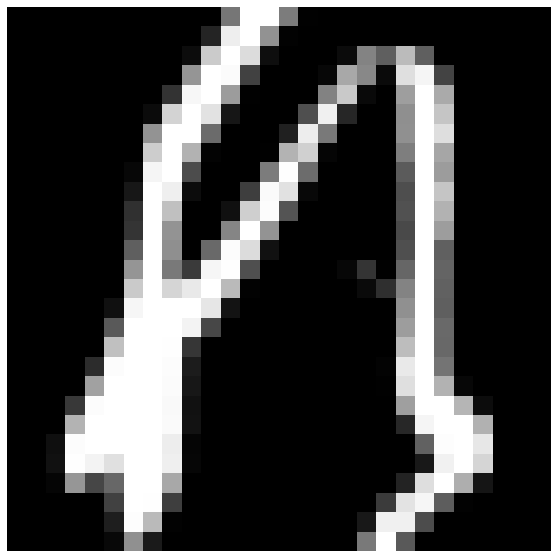

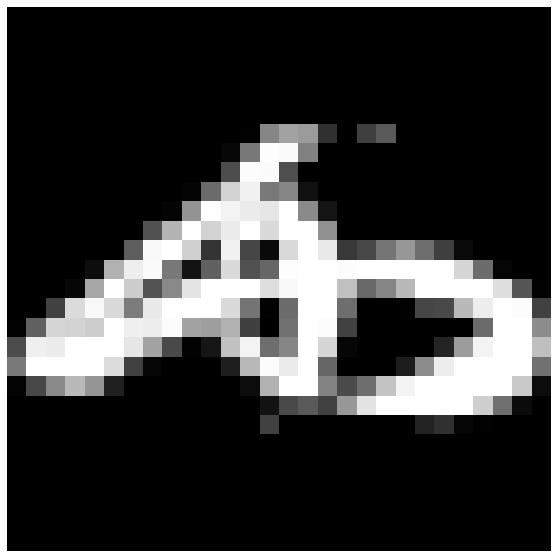

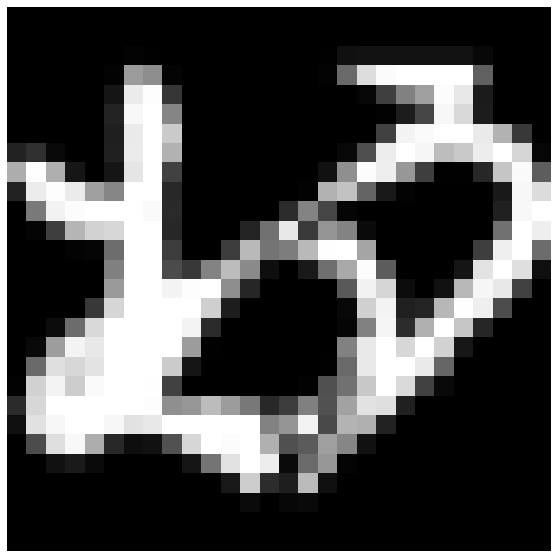

In [51]:
for i in range(3):
    plot(X[i,0,:,:])
#this plots 3 of the japanese characters

In [52]:
Y[454]

6

In [53]:
X[0:25,0,:,:].shape

(25, 28, 28)

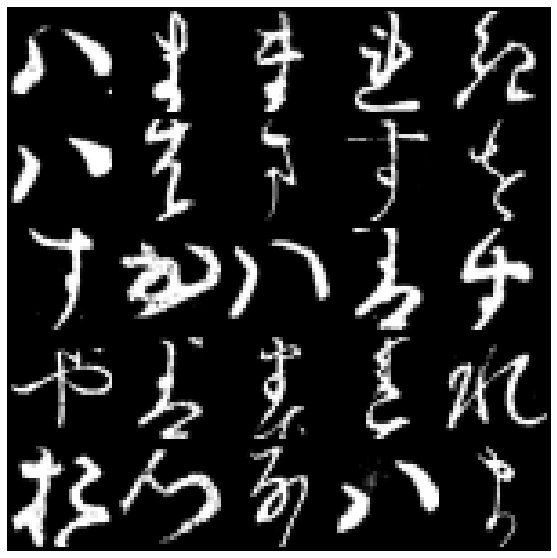

In [54]:
montage_plot(X[125:150,0,:,:])

In [55]:
X.shape[0]

60000

In [56]:
X_test.shape

(10000, 1, 28, 28)

In [57]:
X.shape[0]

60000

In [58]:
X_test.shape[0]

10000

In [59]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [60]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

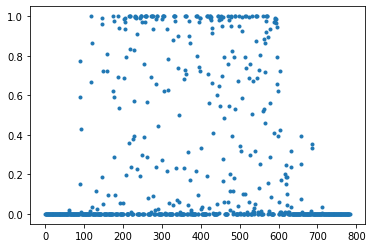

In [61]:
plt.plot(X[100],'.')

(array([548.,  11.,  17.,  18.,  15.,  17.,  16.,  14.,  16., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

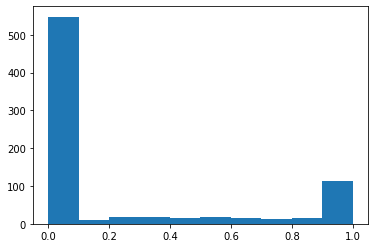

In [62]:
plt.hist(X[0])

In [63]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [64]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W.data'

In [65]:
W = torch.load("W.data")

In [67]:
W.shape
#the shape of variable W

torch.Size([784, 10])

In [69]:
X.shape
#the shape of variable X

torch.Size([60000, 784])

In [70]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

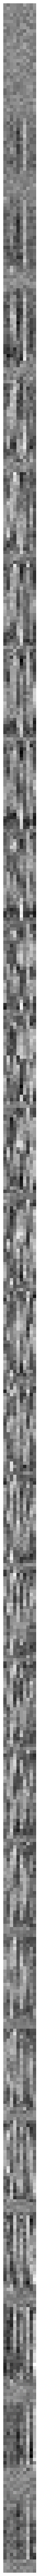

In [71]:
plot(W[0:784,:10])

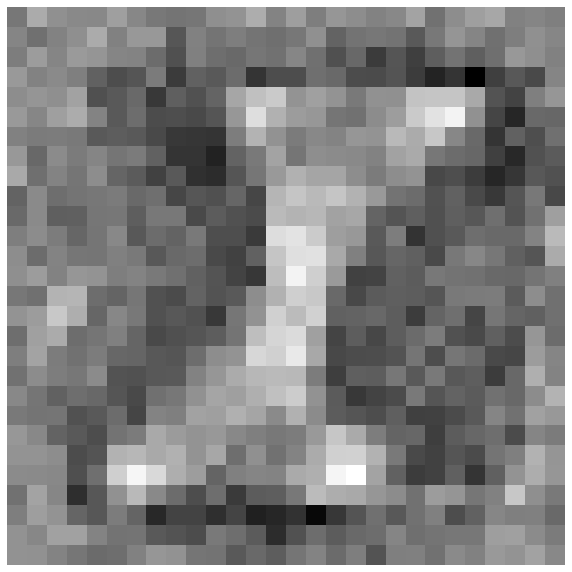

In [74]:
plot(W[:,1].reshape(28,28))
#this plots W and shapes it to be 28 by 28 pixels

In [75]:
X.shape

torch.Size([60000, 784])

In [76]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [77]:
x,y = get_batch('train')

In [78]:
x.shape

torch.Size([1000, 784])

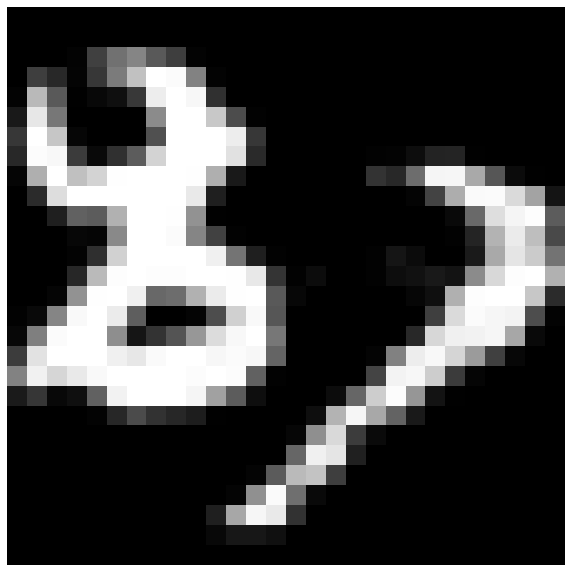

In [84]:
plot(x[0].reshape(28,28))
#plots the 1st character on the x array, so its 28 by 28 pixels

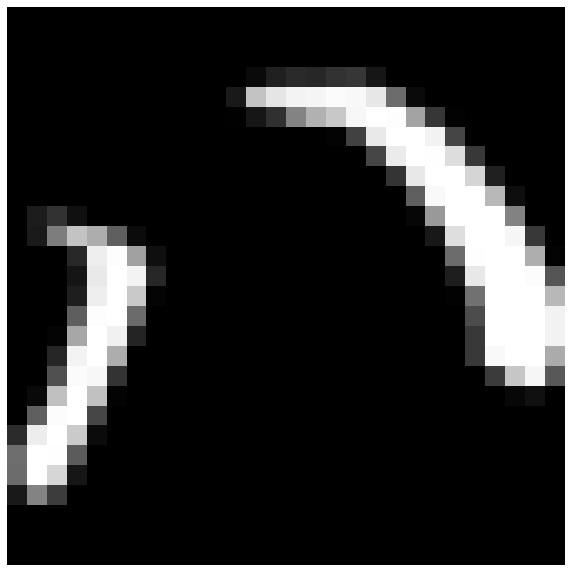

In [85]:
plot(x[1].reshape(28,28))
#plots the 2nd character on the x array, so its 28 by 28 pixels

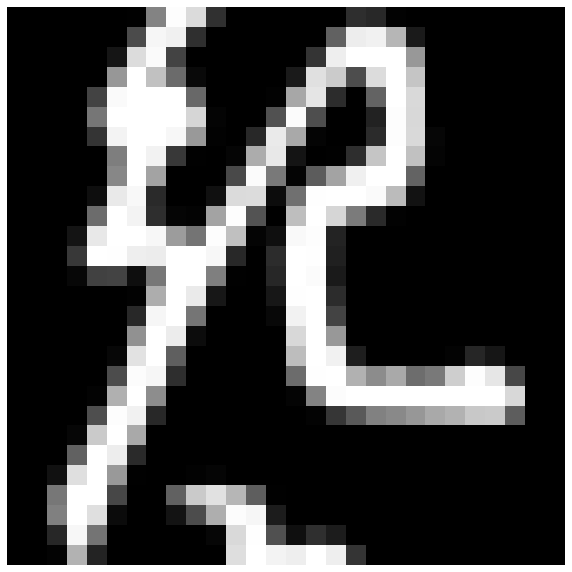

In [86]:
plot(x[2].reshape(28,28))
#plots the 3rd character on the x array, so its 28 by 28 pixels

In [87]:
y
#prints the variable y

tensor([0., 5., 1., 8., 4., 1., 1., 3., 5., 2., 4., 5., 3., 4., 8., 5., 3., 1.,
        8., 3., 2., 3., 7., 7., 7., 6., 9., 9., 5., 7., 2., 5., 4., 7., 1., 5.,
        3., 4., 9., 3., 5., 2., 3., 7., 5., 3., 7., 0., 2., 0., 2., 5., 3., 0.,
        0., 7., 2., 1., 8., 1., 2., 8., 1., 0., 4., 1., 0., 9., 8., 1., 3., 0.,
        4., 8., 5., 7., 9., 1., 2., 9., 2., 6., 7., 3., 2., 3., 4., 9., 5., 5.,
        4., 5., 1., 1., 3., 5., 2., 9., 9., 1., 2., 3., 4., 8., 7., 9., 0., 6.,
        6., 8., 8., 5., 6., 9., 5., 3., 4., 0., 2., 4., 9., 8., 3., 2., 5., 3.,
        8., 9., 9., 5., 2., 4., 1., 4., 2., 7., 7., 1., 2., 0., 0., 4., 5., 0.,
        4., 6., 1., 7., 2., 3., 0., 1., 4., 6., 3., 8., 6., 7., 1., 9., 9., 9.,
        7., 3., 0., 5., 5., 7., 2., 3., 4., 7., 6., 7., 1., 7., 3., 7., 5., 4.,
        9., 9., 6., 6., 8., 3., 5., 7., 7., 0., 1., 7., 1., 9., 8., 3., 9., 5.,
        9., 8., 3., 9., 1., 3., 1., 5., 7., 8., 1., 6., 8., 4., 5., 7., 6., 2.,
        0., 0., 2., 1., 4., 7., 5., 1., 

In [88]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [89]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [90]:
(x@W).shape

torch.Size([1000, 10])

In [93]:
%%timeit
x@W
#this times how long it takes to execute x@W

21.2 µs ± 292 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [96]:
X@W
#prints X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [97]:
x@W

tensor([[-10.1954, -33.0619,  -3.7859,  ..., -11.9577,  -8.9062, -26.2200],
        [ -2.2038, -11.6036,   0.2341,  ..., -12.0618, -11.0614, -22.0831],
        [-16.1656, -26.7735,  -3.6956,  ...,  -7.5825, -21.1117, -16.1340],
        ...,
        [-14.0457, -26.3885,  -9.2944,  ...,  -6.9801, -15.1921, -25.0177],
        [ -2.4080, -13.7090, -12.3536,  ...,   3.3982, -12.6602,   1.9934],
        [-10.5969, -10.4713,   1.5797,  ...,  -8.9499, -16.4027, -10.9742]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [98]:
y2 = x@W 

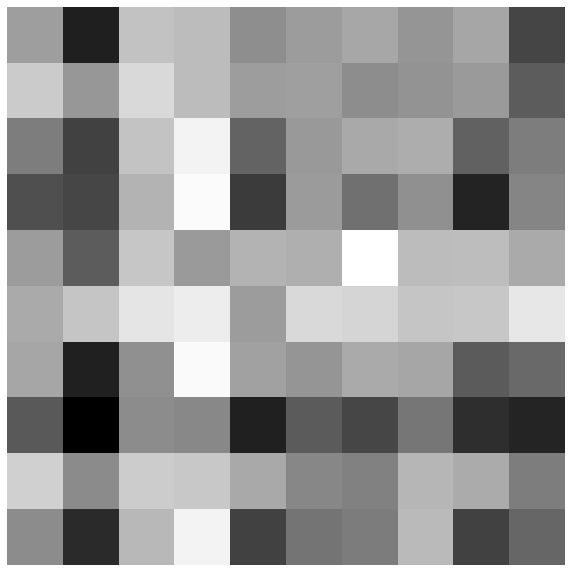

In [99]:
plot(y2[0:10,:])

In [100]:
y

tensor([0., 5., 1., 8., 4., 1., 1., 3., 5., 2., 4., 5., 3., 4., 8., 5., 3., 1.,
        8., 3., 2., 3., 7., 7., 7., 6., 9., 9., 5., 7., 2., 5., 4., 7., 1., 5.,
        3., 4., 9., 3., 5., 2., 3., 7., 5., 3., 7., 0., 2., 0., 2., 5., 3., 0.,
        0., 7., 2., 1., 8., 1., 2., 8., 1., 0., 4., 1., 0., 9., 8., 1., 3., 0.,
        4., 8., 5., 7., 9., 1., 2., 9., 2., 6., 7., 3., 2., 3., 4., 9., 5., 5.,
        4., 5., 1., 1., 3., 5., 2., 9., 9., 1., 2., 3., 4., 8., 7., 9., 0., 6.,
        6., 8., 8., 5., 6., 9., 5., 3., 4., 0., 2., 4., 9., 8., 3., 2., 5., 3.,
        8., 9., 9., 5., 2., 4., 1., 4., 2., 7., 7., 1., 2., 0., 0., 4., 5., 0.,
        4., 6., 1., 7., 2., 3., 0., 1., 4., 6., 3., 8., 6., 7., 1., 9., 9., 9.,
        7., 3., 0., 5., 5., 7., 2., 3., 4., 7., 6., 7., 1., 7., 3., 7., 5., 4.,
        9., 9., 6., 6., 8., 3., 5., 7., 7., 0., 1., 7., 1., 9., 8., 3., 9., 5.,
        9., 8., 3., 9., 1., 3., 1., 5., 7., 8., 1., 6., 8., 4., 5., 7., 6., 2.,
        0., 0., 2., 1., 4., 7., 5., 1., 

In [101]:
one_hot(y)

<ipython-input-42-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]], device='cuda:0')

<ipython-input-42-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


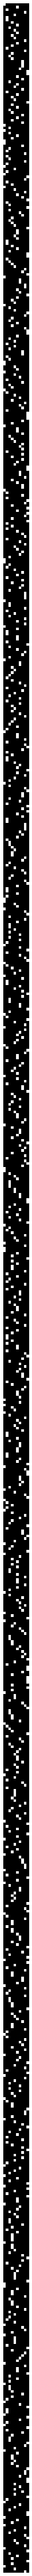

In [102]:
plot(one_hot(y))

<ipython-input-42-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


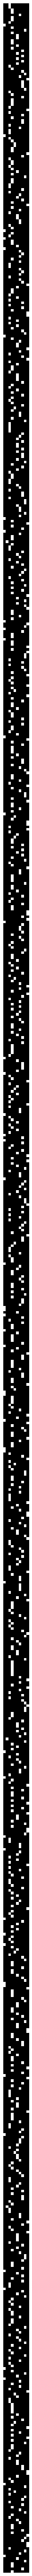

In [103]:
plot(one_hot(torch.argmax(y2,1)))

In [104]:
y

tensor([0., 5., 1., 8., 4., 1., 1., 3., 5., 2., 4., 5., 3., 4., 8., 5., 3., 1.,
        8., 3., 2., 3., 7., 7., 7., 6., 9., 9., 5., 7., 2., 5., 4., 7., 1., 5.,
        3., 4., 9., 3., 5., 2., 3., 7., 5., 3., 7., 0., 2., 0., 2., 5., 3., 0.,
        0., 7., 2., 1., 8., 1., 2., 8., 1., 0., 4., 1., 0., 9., 8., 1., 3., 0.,
        4., 8., 5., 7., 9., 1., 2., 9., 2., 6., 7., 3., 2., 3., 4., 9., 5., 5.,
        4., 5., 1., 1., 3., 5., 2., 9., 9., 1., 2., 3., 4., 8., 7., 9., 0., 6.,
        6., 8., 8., 5., 6., 9., 5., 3., 4., 0., 2., 4., 9., 8., 3., 2., 5., 3.,
        8., 9., 9., 5., 2., 4., 1., 4., 2., 7., 7., 1., 2., 0., 0., 4., 5., 0.,
        4., 6., 1., 7., 2., 3., 0., 1., 4., 6., 3., 8., 6., 7., 1., 9., 9., 9.,
        7., 3., 0., 5., 5., 7., 2., 3., 4., 7., 6., 7., 1., 7., 3., 7., 5., 4.,
        9., 9., 6., 6., 8., 3., 5., 7., 7., 0., 1., 7., 1., 9., 8., 3., 9., 5.,
        9., 8., 3., 9., 1., 3., 1., 5., 7., 8., 1., 6., 8., 4., 5., 7., 6., 2.,
        0., 0., 2., 1., 4., 7., 5., 1., 

In [105]:
torch.argmax(y2,1)

tensor([2, 2, 3, 3, 6, 3, 3, 2, 0, 3, 8, 3, 5, 5, 3, 3, 5, 3, 7, 5, 7, 5, 7, 5,
        2, 3, 7, 8, 6, 9, 7, 7, 7, 8, 2, 3, 7, 3, 3, 3, 2, 9, 2, 7, 3, 7, 7, 2,
        6, 2, 2, 0, 2, 3, 4, 4, 3, 3, 9, 7, 2, 3, 3, 2, 3, 5, 3, 8, 3, 3, 2, 2,
        7, 2, 6, 5, 7, 3, 9, 3, 6, 2, 5, 5, 6, 6, 2, 3, 0, 3, 2, 0, 3, 3, 5, 0,
        6, 7, 6, 3, 6, 2, 2, 6, 7, 6, 2, 6, 7, 9, 5, 3, 3, 2, 5, 2, 7, 2, 7, 3,
        9, 9, 2, 5, 2, 5, 3, 7, 8, 0, 3, 6, 5, 5, 9, 6, 2, 7, 9, 2, 5, 3, 3, 2,
        5, 5, 5, 7, 3, 2, 5, 3, 7, 3, 2, 3, 7, 4, 3, 6, 6, 3, 8, 2, 2, 2, 2, 7,
        6, 5, 7, 5, 5, 7, 5, 7, 7, 5, 8, 3, 7, 5, 2, 3, 3, 2, 2, 5, 6, 2, 7, 7,
        2, 8, 8, 5, 6, 6, 8, 6, 0, 3, 9, 3, 7, 0, 6, 3, 3, 1, 3, 2, 2, 7, 5, 6,
        2, 5, 7, 3, 8, 7, 6, 2, 7, 3, 8, 3, 7, 3, 9, 5, 8, 5, 8, 9, 3, 3, 6, 3,
        0, 9, 8, 0, 7, 3, 3, 0, 3, 3, 9, 3, 9, 8, 8, 2, 7, 2, 7, 8, 3, 9, 3, 2,
        3, 9, 3, 4, 2, 9, 3, 7, 3, 3, 5, 2, 3, 3, 7, 2, 7, 3, 3, 2, 5, 0, 9, 3,
        7, 3, 3, 3, 5, 3, 7, 7, 3, 6, 8,

In [106]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0790, device='cuda:0')

In [112]:
b
#prints b

1000

In [113]:
X.shape
#prints the shape of the variable X

torch.Size([60000, 784])

In [114]:
X@W
#prints X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [115]:
torch.argmax(X@W,1)

tensor([5, 2, 3,  ..., 2, 2, 5], device='cuda:0')

In [116]:
Y
#prints Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [118]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

#divides the torch.sum by 60000

tensor(0.0789, device='cuda:0')

In [119]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [121]:
W.shape
#prints the shape of the variable W

torch.Size([784, 10])

In [122]:
W[:,0].shape

torch.Size([784])

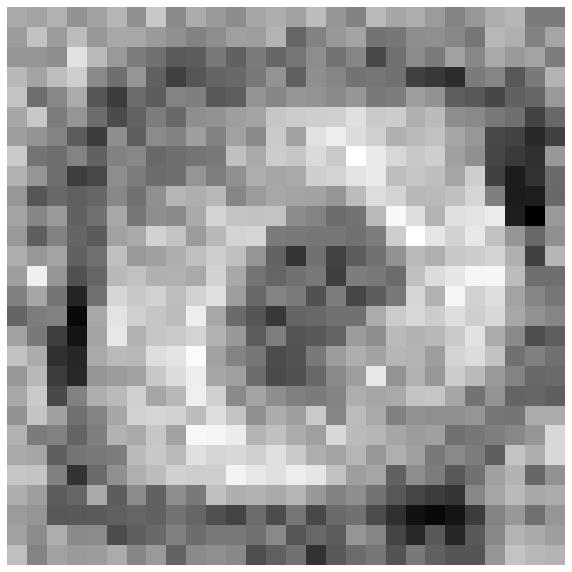

In [124]:
plot(W[:,0].reshape(28,28))
#plots W and the first thing in its array in a 28 by 28 square

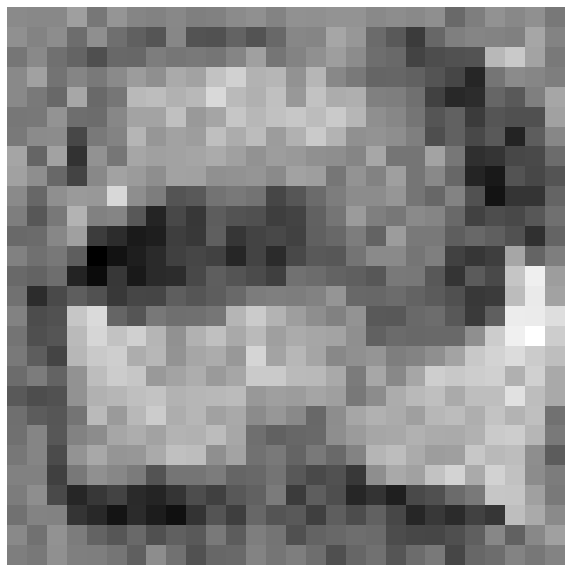

In [125]:
plot(W[:,2].reshape(28,28))

In [126]:
W.shape

torch.Size([784, 10])

In [127]:
(W.T).shape

torch.Size([10, 784])

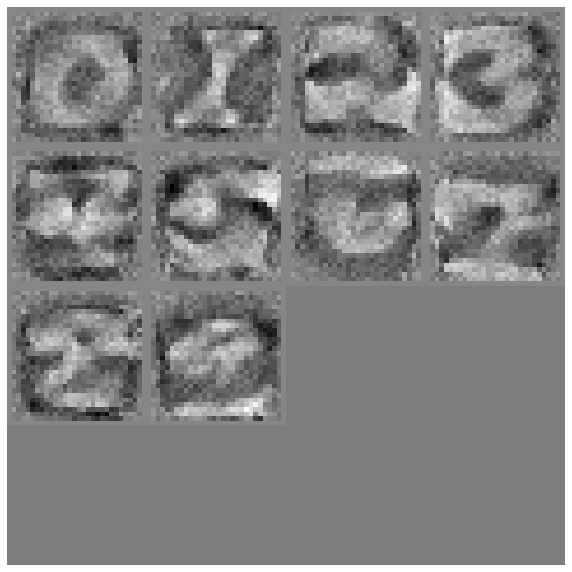

In [128]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [129]:
###################################################

In [130]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [131]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [132]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [133]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [134]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [135]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [136]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [137]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [138]:
X.shape

torch.Size([60000, 784])

In [139]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [140]:
def model(x,w):

    return x@w[0]

In [141]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-42-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


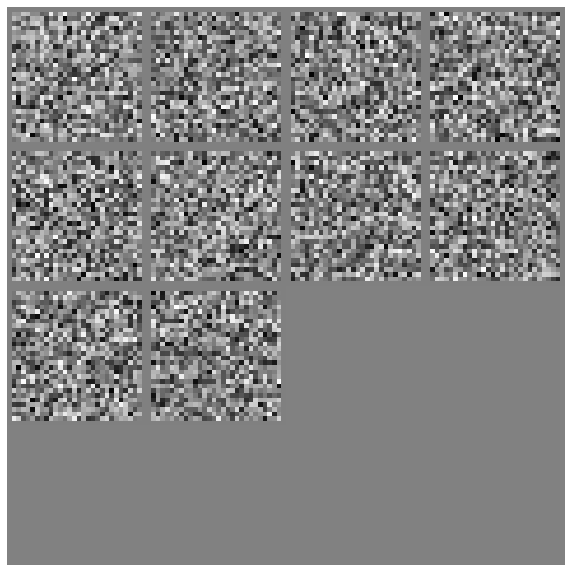

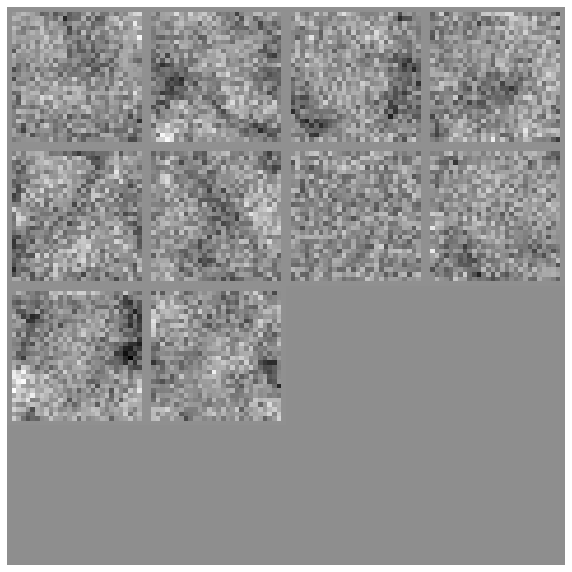

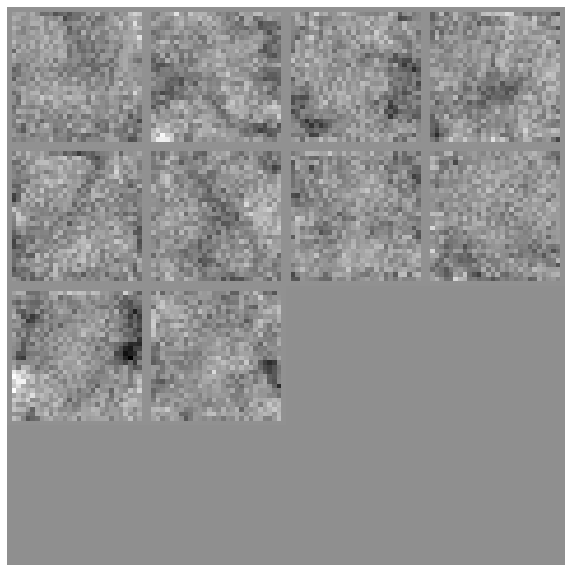

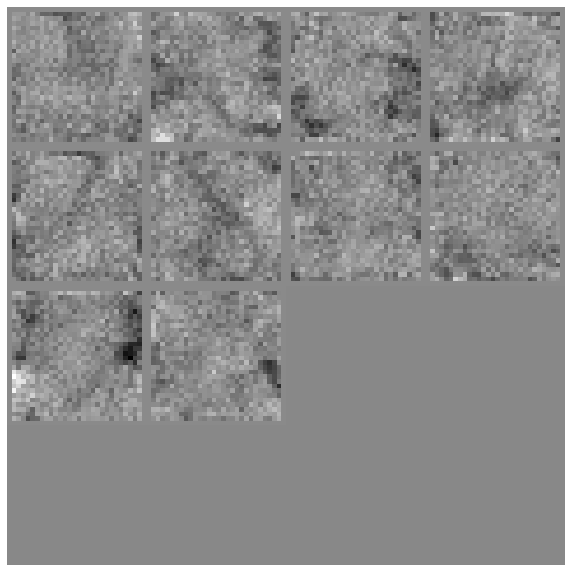

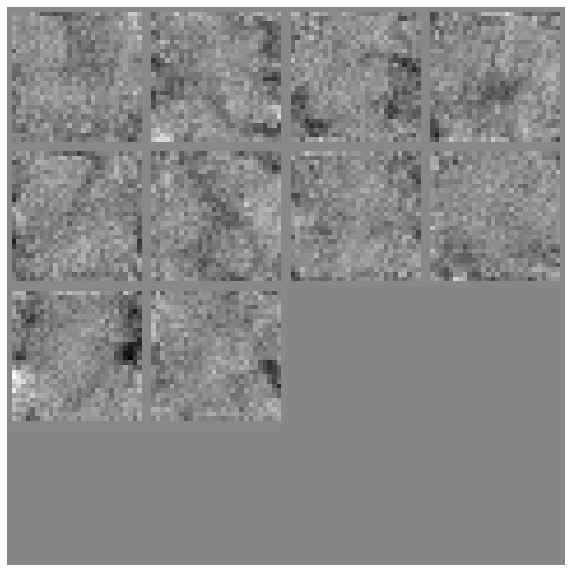

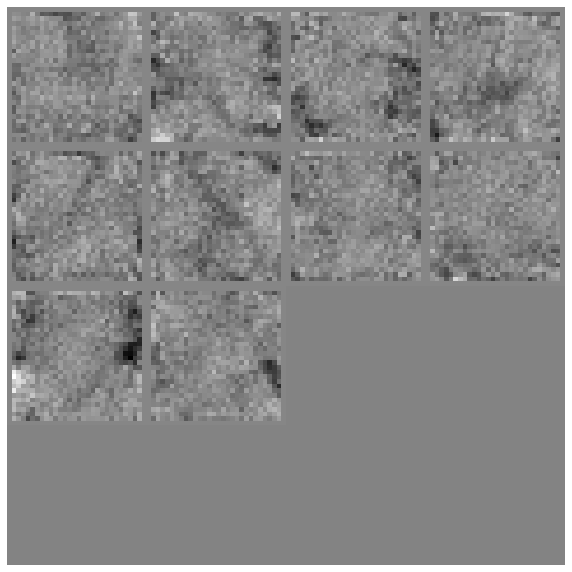

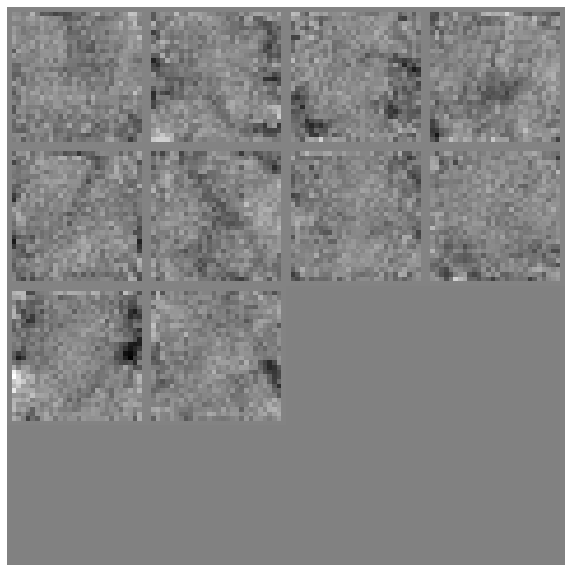

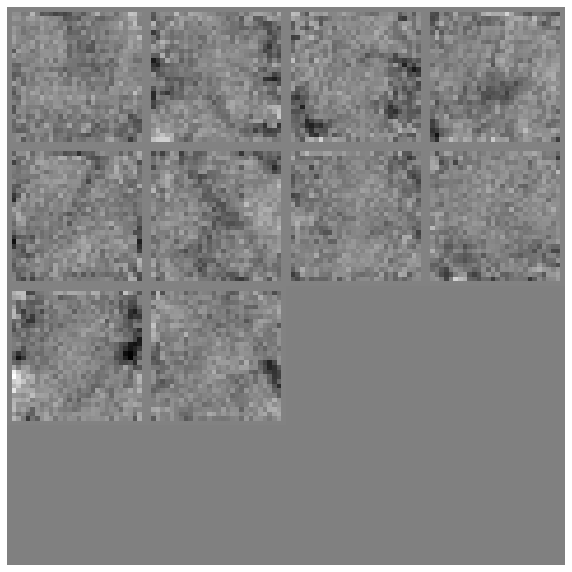

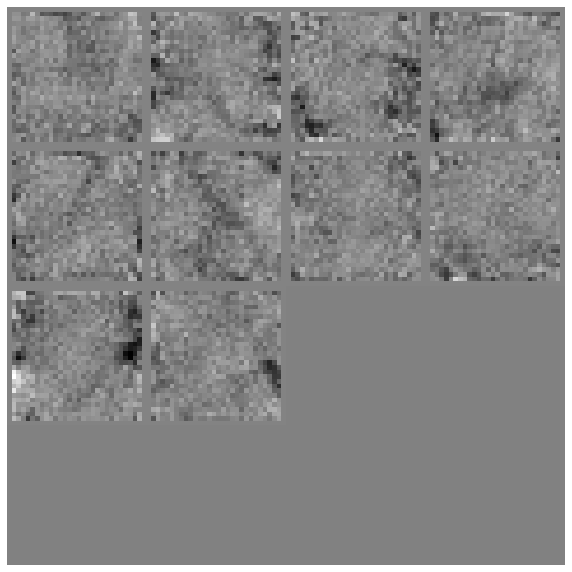

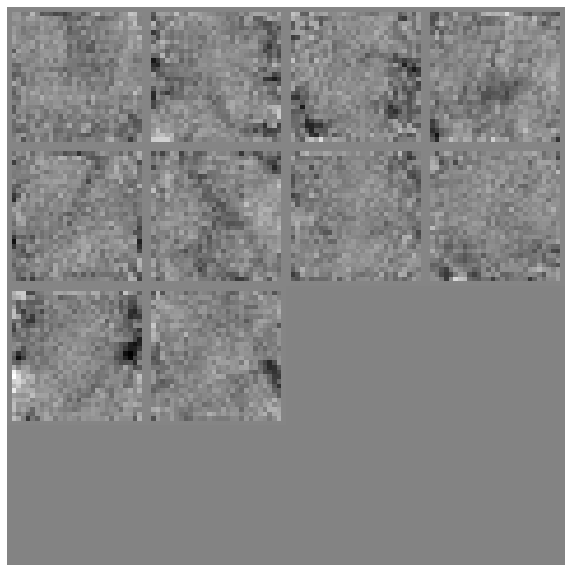

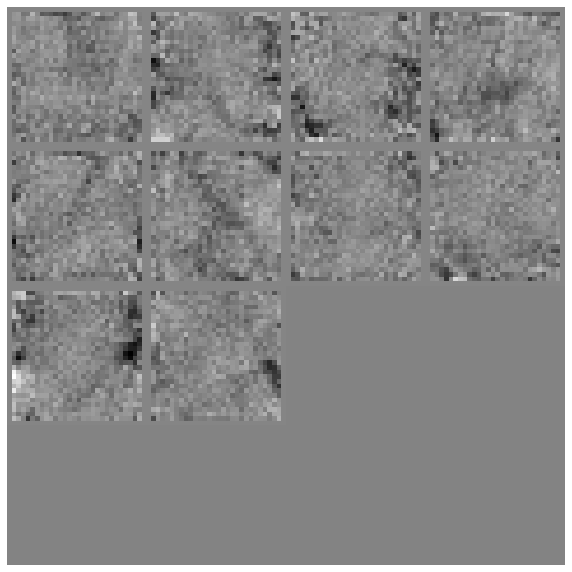

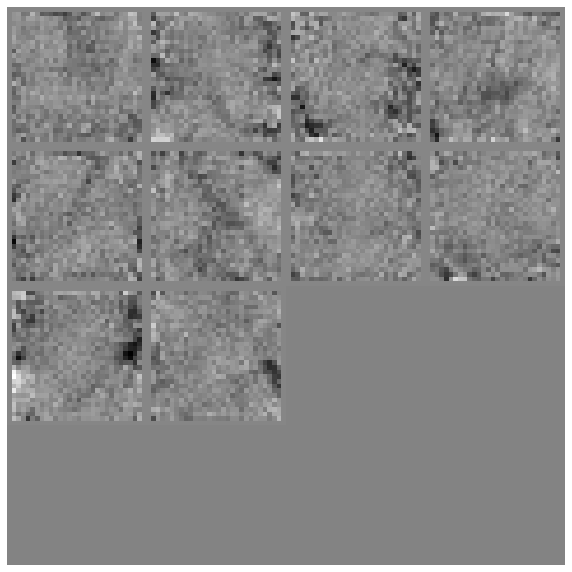

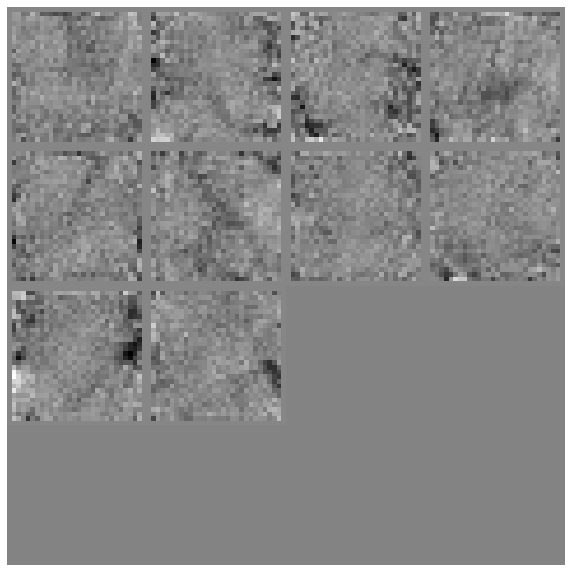

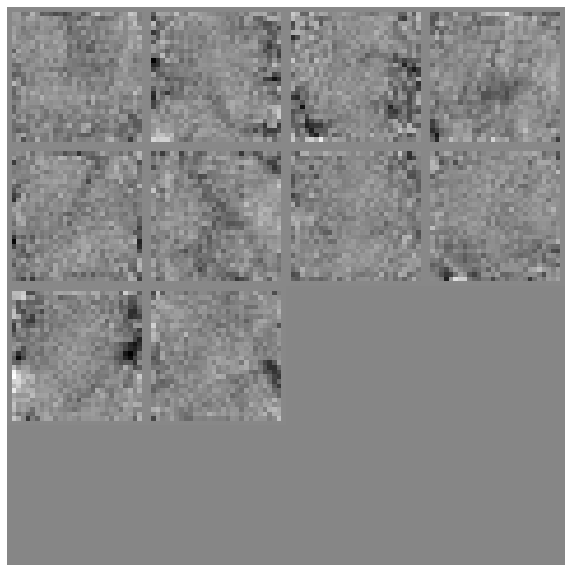

KeyboardInterrupt: ignored

In [142]:
wb.init(project="Simple_Linear_Adam_K");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing